<a href="https://colab.research.google.com/github/HanqiLouis/IPEO_Project2024/blob/main/LargeRocksDetectionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install tifffile

In [9]:
import json
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tifffile
import os

In [8]:
data_root = '/content/drive/MyDrive/IPEO/Project/LargeRocksDetectionDataset'

In [12]:
# Illustration of some samples coming from the dataset
json_file_path = os.path.join(data_root, 'large_rock_dataset.json')

# Load the JSON file
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)
print('Genreal information about the data:', data['info'])
dataset = data['dataset']
print('Number of samples:', len(dataset))
sample_info = dataset[10]
print('Looking at the first images:', sample_info['file_name'])
print('Looking at rocks annotations for the firsdt images:\n', sample_info['rocks_annotations'][0])

Genreal information about the data: {'description': 'Large Rocks Detection Dataset ', 'version': '1.0', 'year': 2024, 'contributor': 'Valerie Zermatten', 'date_created': '2024/09/30'}
Number of samples: 992
Looking at the first images: 2581_1126_2_2.tif
Looking at rocks annotations for the firsdt images:
 {'rock_id': 1459.0, 'abs_rock_coordinates': [2581767.93, 1126509.48], 'pixel_within_patch_coordinates': [608.0, 51.0], 'relative_within_patch_location': [0.95, 0.08]}


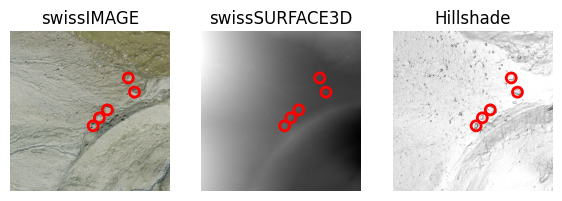

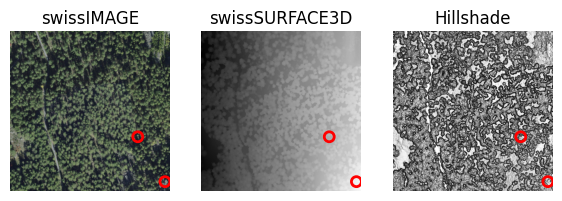

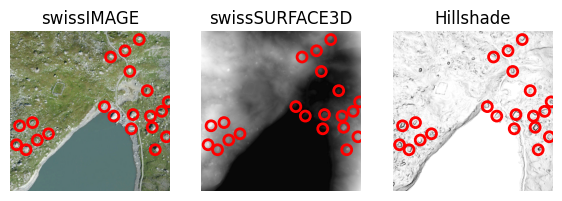

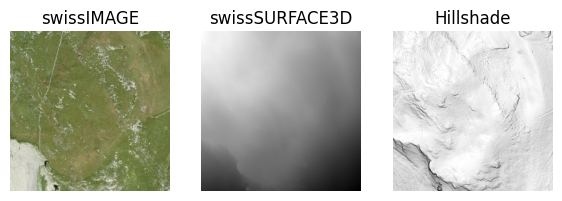

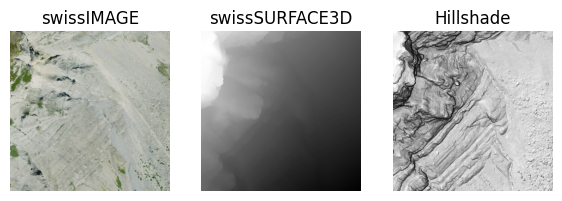

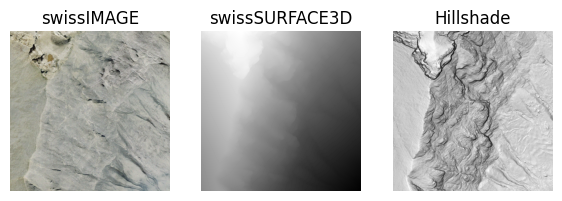

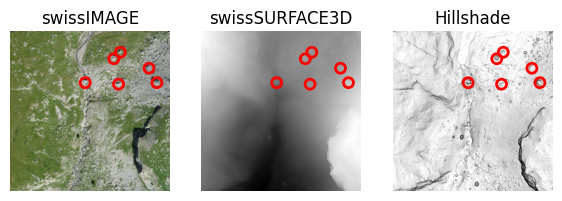

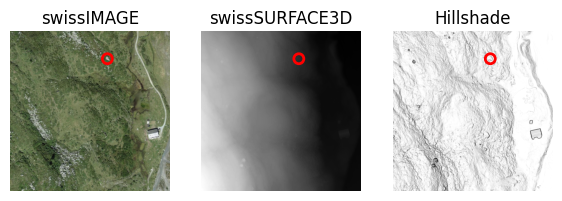

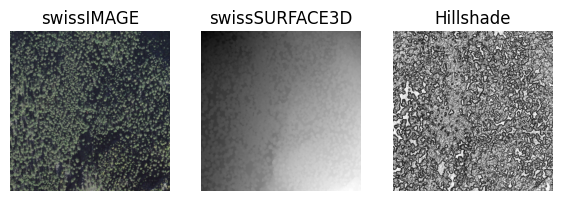

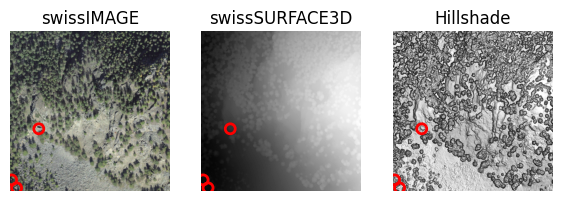

In [29]:
def plot_images_with_bboxes(sample_info):

  src_SI = os.path.join(data_root, 'swissImage_50cm_patches', sample_info['file_name'])
  src_SS = os.path.join(data_root, 'swissSURFACE3D_patches', sample_info['file_name'])
  src_HS = os.path.join(data_root, 'swissSURFACE3D_hillshade_patches', sample_info['file_name'])

  # Read and draw the bounding boxes
  bboxes = sample_info['rocks_annotations'] # Assuming each image has an 'annotations' field containing the bounding boxes
  img_SI = tifffile.imread(src_SI)

  # Open and display the image
  image = tifffile.imread(src_SI)
  fig, ax = plt.subplots(1, 3, figsize=(7, 7))
  ax[0].imshow(image)
  ax[0].axis('off')
  ax[0].set_title('swissIMAGE')

  for box in bboxes:
    x, y = box['pixel_within_patch_coordinates']
    # draw the squares as a patch (red square)
    circ = patches.Circle((x, y), radius=20, linewidth=2, edgecolor='r', facecolor='none')
    ax[0].add_patch(circ)

  dsm = tifffile.imread(src_SS)
  ax[1].imshow(dsm, cmap='gist_gray')
  ax[1].axis('off')
  ax[1].set_title('swissSURFACE3D')

  for box in bboxes:
    x, y = box['pixel_within_patch_coordinates']
    # draw the circles as a patch (red cirlce)
    circ = patches.Circle((x, y), radius=20, linewidth=2, edgecolor='r', facecolor='none')
    ax[1].add_patch(circ)

  hillshade = tifffile.imread(src_HS)
  ax[2].imshow(hillshade, cmap='gist_gray')
  ax[2].axis('off')
  ax[2].set_title('Hillshade')

  for box in bboxes:
    x, y = box['pixel_within_patch_coordinates']
    # draw the squares as a patch (red square)
    circ = patches.Circle((x, y), radius=20, linewidth=2, edgecolor='r', facecolor='none')
    ax[2].add_patch(circ)

  # Show the plot with bounding boxes
  plt.show()

for k in range(10):
  #random.shuffle(dataset)
  plot_images_with_bboxes(dataset[k])